In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [175]:
df=pd.read_csv("Sleep_Efficiency.csv")

In [176]:
df.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


### Missing Value

In [177]:
df.isnull().sum()

ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
dtype: int64

#### Dealing with Missing Value

In [178]:
df['Awakenings'].fillna(int(df['Awakenings'].mean()), inplace=True)
df['Caffeine consumption'].fillna(int(df['Caffeine consumption'].mean()), inplace=True)
df['Alcohol consumption'].fillna(int(df['Alcohol consumption'].mean()), inplace=True)
df['Exercise frequency'].fillna(int(df['Exercise frequency'].mean()), inplace=True)
df.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [179]:
df.isnull().sum()

ID                        0
Age                       0
Gender                    0
Bedtime                   0
Wakeup time               0
Sleep duration            0
Sleep efficiency          0
REM sleep percentage      0
Deep sleep percentage     0
Light sleep percentage    0
Awakenings                0
Caffeine consumption      0
Alcohol consumption       0
Smoking status            0
Exercise frequency        0
dtype: int64

In [180]:
bool_series = df.duplicated()
print(bool_series)

0      False
1      False
2      False
3      False
4      False
       ...  
447    False
448    False
449    False
450    False
451    False
Length: 452, dtype: bool


In [181]:
from sklearn.preprocessing import OneHotEncoder
#one_hot_encoded_data = pd.get_dummies(df, columns = ['Gender'])
#df=df.drop(columns=['Bedtime','Wakeup time'])
#df = pd.get_dummies(df, columns = ['Gender'])
df['Gender']=df['Gender'].astype('category')
df['Gen_new']=df['Gender'].cat.codes
enc=OneHotEncoder()
enc_data=pd.DataFrame(enc.fit_transform(df[['Gen_new',]]).toarray())
 
#Merge with main
df=df.join(enc_data)
 
print(df.head())
#print(one_hot_encoded_data)

   ID  Age  Gender              Bedtime          Wakeup time  Sleep duration  \
0   1   65  Female  2021-03-06 01:00:00  2021-03-06 07:00:00             6.0   
1   2   69    Male  2021-12-05 02:00:00  2021-12-05 09:00:00             7.0   
2   3   40  Female  2021-05-25 21:30:00  2021-05-25 05:30:00             8.0   
3   4   40  Female  2021-11-03 02:30:00  2021-11-03 08:30:00             6.0   
4   5   57    Male  2021-03-13 01:00:00  2021-03-13 09:00:00             8.0   

   Sleep efficiency  REM sleep percentage  Deep sleep percentage  \
0              0.88                    18                     70   
1              0.66                    19                     28   
2              0.89                    20                     70   
3              0.51                    23                     25   
4              0.76                    27                     55   

   Light sleep percentage  Awakenings  Caffeine consumption  \
0                      12         0.0          

#### Correlation

In [182]:
df.corr()

,ID,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency,Gen_new,0,1
ID,1.000000,0.021310,0.014333,-0.025624,0.051636,-0.047300,0.036463,-0.058448,-0.057293,0.112515,0.023232,-0.013124,0.013124,-0.013124
Age,0.021310,1.000000,-0.062462,0.098357,0.042091,0.021730,-0.031905,-0.016677,-0.167806,0.047380,0.075936,0.244468,-0.244468,0.244468
Sleep duration,0.014333,-0.062462,1.000000,-0.027467,-0.015940,-0.037304,0.041804,-0.000962,-0.014419,-0.045510,-0.070907,-0.044376,0.044376,-0.044376
Sleep efficiency,-0.025624,0.098357,-0.027467,1.000000,0.062362,0.787335,-0.819204,-0.552179,0.063223,-0.383701,0.258393,0.010062,-0.010062,0.010062
REM sleep percentage,0.051636,0.042091,-0.015940,0.062362,1.000000,-0.208159,-0.017462,-0.026594,0.058064,-0.051111,0.037996,-0.161102,0.161102,-0.161102
Deep sleep percentage,-0.047300,0.021730,-0.037304,0.787335,-0.208159,1.000000,-0.974311,-0.294568,0.001802,-0.356217,0.174522,0.075939,-0.075939,0.075939
Light sleep percentage,0.036463,-0.031905,0.041804,-0.819204,-0.017462,-0.974311,1.000000,0.307243,-0.015211,0.375908,-0.187152,-0.040534,0.040534,-0.040534
Awakenings,-0.058448,-0.016677,-0.000962,-0.552179,-0.026594,-0.294568,0.307243,1.000000,-0.107957,0.192192,-0.220395,0.074029,-0.074029,0.074029
Caffeine consumption,-0.057293,-0.167806,-0.014419,0.063223,0.058064,0.001802,-0.015211,-0.107957,1.000000,-0.117538,-0.072634,-0.242775,0.242775,-0.242775
Alcohol consumption,0.112515,0.047380,-0.045510,-0.383701,-0.051111,-0.356217,0.375908,0.192192,-0.117538,1.000000,0.003563,0.057344,-0.057344,0.057344


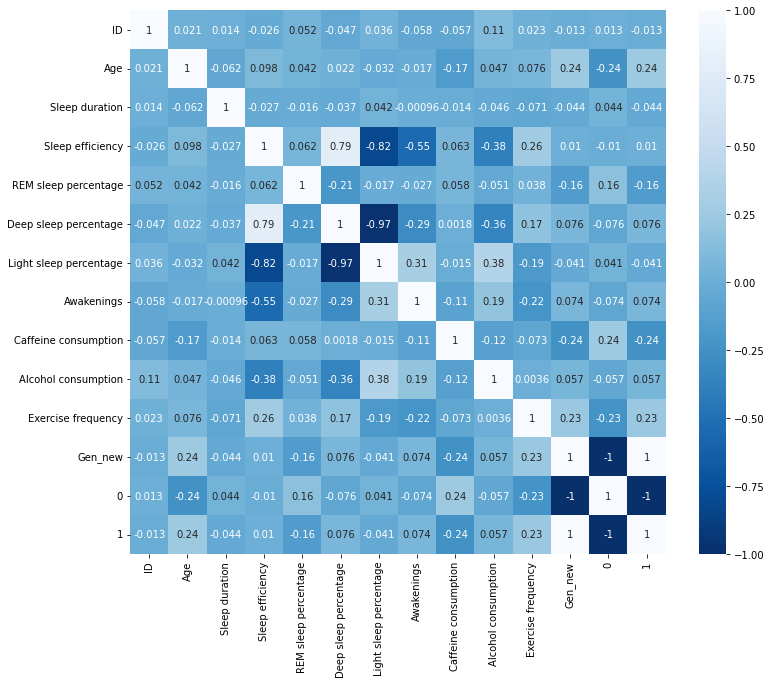

In [183]:
import seaborn as sns
plt.figure(figsize=(12,10))
corr_rel=df.corr()
sns.heatmap(corr_rel,annot=True,cmap=plt.cm.Blues_r)
plt.show()

In [184]:
def corre(data,threshold):
    col_corr=set()
    corr_matrix=data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>abs(threshold):
                colname=corr_matrix.columns[j]
                #colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [185]:
corr_features = corre(df, 0.7)
co_features_len=len(set(corr_features))
print(co_features_len)
print(corr_features)

4
{0, 'Sleep efficiency', 'Deep sleep percentage', 'Gen_new'}


In [186]:
#df=df.drop(corr_features,axis=1)

### Outlier Detection

#### Z Score

In [187]:
z_score_outlier=[]
def z_score_func(data):
    threshold=3
    mean=np.mean(data)
    std=np.std(data)
    
    for i in data:
        z_score=(1-mean)/std
        if(np.abs(z_score)>threshold):
            z_score_outlier.append(y)
        return(z_score_outlier)

In [188]:
outlier_detect_awake=z_score_func(df['Awakenings'])
print(outlier_detect_awake)

[]


#### Visualization

C:\Users\coder\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

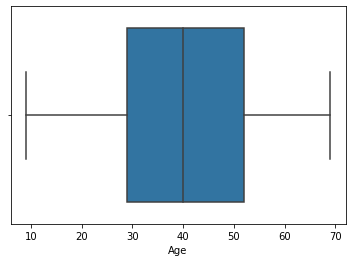

In [189]:
import seaborn as sns
sns.boxplot('Age',data=df)

C:\Users\coder\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Caffeine consumption'>

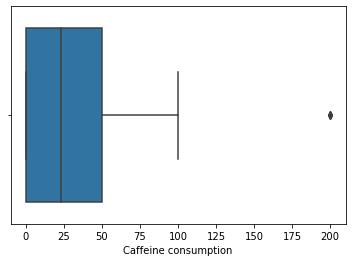

In [190]:
sns.boxplot('Caffeine consumption',data=df)

C:\Users\coder\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exercise frequency'>

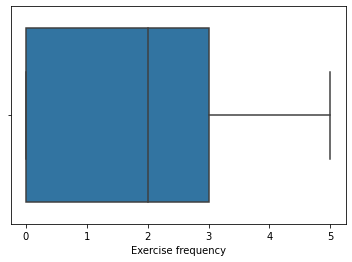

In [191]:
sns.boxplot('Exercise frequency',data=df)

In [192]:
X=df.drop(columns=['Sleep efficiency'],axis=1)
y=df['Sleep efficiency']

In [193]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [194]:
#from sklearn.linear_model import LinearRegression
from sklearn import  linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
#reg = LinearRegression().fit(X, y)

C:\Users\coder\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\coder\anaconda3\lib\site-packages\sklearn\utils\validation.py:964: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(


ValueError: Unable to convert array of bytes/strings into decimal numbers with dtype='numeric'